<span style="display:block;text-align:center"><img src="https://github.com/MohammedHani98/RFM-Analysis/blob/main/RFM_Logo.png?raw=true" style="width:600px;height:500px;" alt="RFM"></span>

## Objective

Based on the dataset in hand, we aim to perform RFM (Recency, Frequeny, and Monetary Value) analysis on the data to be able to segment the customers based on their purchasing pattern and behavior.

## About the dataset

**Online Retail II** is a dataset provided by <a href = "https://archive.ics.uci.edu/dataset/502/online+retail+ii">UCI Machine Learning Repository</a>. The dataset can be described as:

*'A transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.'*

#### Variables Description
**InvoiceNo**: A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name.

**Quantity**: The quantities of each product (item) per transaction.

**InvoiceDate**: The day and time when a transaction was generated.

**UnitPrice**: Product price per unit in sterling (Â£).

**CustomerID**: A 5-digit integral number uniquely assigned to each customer.

**Country**: The name of the country where a customer resides. (Nominal)

| Variable | datatype |
|----------|----------|
| InvoiceNo | Nominal |
| StockCode | Nominal |
| Description | Text |
| Quantity | Integer |
| InvoiceDate | Timestamp |
| UnitPrice | Float |
| CustomerID | Nominal |
| Country | Nominal |

## Methodology

- **Cacluclating the RFM values:** Group the customers and determine the RFM values for each customer
- **Segmentation:** Based on the RFM values calculated, we will segment customers into multiple categories
- **Targeting:** Devise different strategies to better target each segment determined

## Importing Libraries

In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd
from datetime import datetime as dt
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To eliminate warnings messages
import warnings

warnings.filterwarnings('ignore')

## Gather the data

In [2]:
# Reading the csv file
df = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding='unicode_escape')

## Assess the data

In [3]:
# Get a glimpse of the dataframe
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
482030,577403,22339,CHRISTMAS TREE PAINTED ZINC,16,11/20/2011 10:15,0.19,13988.0,United Kingdom
100530,544823,22993,SET OF 4 PANTRY JELLY MOULDS,24,2/24/2011 9:28,1.25,14004.0,United Kingdom
175727,551983,23206,LUNCH BAG APPLE DESIGN,10,5/5/2011 14:32,1.65,17735.0,United Kingdom
208596,555124,22479,DAISY GARDEN MARKER,3,5/31/2011 15:26,1.25,18204.0,United Kingdom
156782,550167,22522,CHILDS GARDEN FORK BLUE,12,4/14/2011 16:38,0.85,14206.0,United Kingdom
438423,574317,23185,FRENCH STYLE STORAGE JAR JAM,18,11/3/2011 18:49,0.29,17078.0,United Kingdom
256009,559422,20724,RED RETROSPOT CHARLOTTE BAG,10,7/8/2011 12:00,0.85,12553.0,France
174488,551818,POST,POSTAGE,4,5/4/2011 11:57,18.00,12569.0,Germany
424330,573263,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,96,10/28/2011 12:34,0.72,13694.0,United Kingdom
270721,560580,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,8,7/19/2011 15:23,7.65,14088.0,United Kingdom


In [4]:
# Check the number of rows and columns of the dataframe
df.shape

(541909, 8)

In [5]:
# Check the duplicate values in the whole dataframe
df.duplicated().sum()

5268

In [6]:
# Assess the data in each column seperately
def calc_stats(col):
  return pd.Series({
      'Data Type': col.dtype, 
      'Non-Missing Values': col.notna().sum(),
      'Unique Values': col.nunique(),
      'Number of Duplicates': col.duplicated().sum()
  })

# Create the cross table
stats_table = df.apply(calc_stats, axis=0)

stats_table

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Data Type,object,object,object,int64,object,float64,float64,object
Non-Missing Values,541909,541909,540455,541909,541909,541909,406829,541909
Unique Values,25900,4070,4223,722,23260,1630,4372,38
Number of Duplicates,516009,537839,537685,541187,518649,540279,537536,541871


In [7]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


<Axes: >

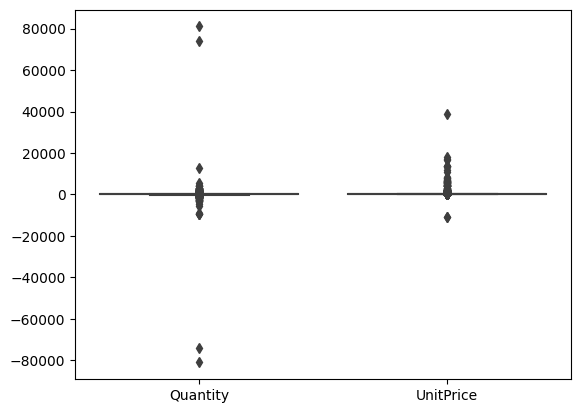

In [9]:
sns.boxplot(df[['Quantity', 'UnitPrice']])

In [10]:
df[df['InvoiceNo'].str.startswith('C')].describe()

,Quantity,UnitPrice,CustomerID
count,9288.000000,9288.000000,8905.000000
mean,-29.885228,48.393661,14991.667266
std,1145.786965,666.600430,1706.772357
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13510.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,5.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [11]:
# Check the stockcodes and the description of the products
print(f"The number of unique stock codes: {df['StockCode'].nunique()} codes")
print(f"The number of unique products: {df['Description'].nunique()} products")

The number of unique stock codes: 4070 codes
The number of unique products: 4223 products


#### Quality issues

1. There are duplicate values that need to be removed
2. There are missing values in columns `Description`, `CustomerID`
3. Invoices that begins with 'C' letter will be eliminated with the orginal invoice since it is cancelled
4. Remove the letter from the `StockCode` cloumn values since it is supposed to be only 5-digit code
5. `CustomerID` column is float type and need to be object type
6. `InvoiceDate` is object type and needs to be datetime type
7. `Country` column has a record for Unspecified country and wrong name for `Israel`
8. Removing any trailing and leading spaces in the records
9. Inconsistent data values for both `Quantity` and `UnitPrice` since there are zeros and negative values
10. Make each product corresponds to only one Stock Code

## Cleansing the data

In [12]:
# Take a copy of the dataframe to keep the original dataframe untouched
df_copy = df.copy()

In [13]:
# Dropping the duplicate values
df_copy.drop_duplicates(inplace=True)

In [14]:
# Removing rows with null values
df_copy.dropna(inplace = True)

In [15]:
# Removing transactions that start with 'C'
df_copy = df_copy[~df_copy['InvoiceNo'].str.startswith('C')]

In [16]:
# Remove letter from the`StockCode` values
df_copy['StockCode'] = df_copy['StockCode'].str.extract(r'(\d+)')

In [17]:
# Change the type of `CustomerID` column to be object
df_copy['CustomerID'] = df_copy['CustomerID'].astype(int).astype('object')
# Change the type of InvoiceDate column to be datetime
df_copy['InvoiceDateTime'] = pd.to_datetime(df_copy['InvoiceDate'], format='%m/%d/%Y %H:%M')
# Drop `InvoiceDate` column
df_copy.drop('InvoiceDate', axis=1, inplace=True)

In [18]:
# Removing the records that contain Unspecified country name
df_copy = df_copy[df_copy['Country'] != 'Unspecified'].reset_index(drop=True)
# Renaming the country the proper name
df_copy['Country'] = df_copy['Country'].replace('Israel', 'Occupied Palestine') 

In [19]:
# Removing trailing and leading spaces in the values of `Description` column
df_copy['Description']= df_copy['Description'].apply(lambda x: x.strip())

In [20]:
# Check the distribution of the numerical features
df_copy.describe(include=np.number)

,Quantity,UnitPrice
count,392491.000000,392491.000000
mean,13.157247,3.125538
std,181.643971,22.247397
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


#### Note

There are still observations that have 0 value in `UnitPrice` column which is illogical so these value will be eliminated 

In [21]:
# Keep only rows with `UnitPrice` greater than 0
df_copy = df_copy[df_copy['UnitPrice'] != 0]

In [22]:
# Create a dictionary to store the first product name for each stock code
stock_code_mapping = {}

# Iterate over the rows of the dataframe
for index, row in df_copy.iterrows():
    stock_code = row['StockCode']
    product_name = row['Description']
    
    # If stock code is not in the mapping, add it
    if stock_code not in stock_code_mapping:
        stock_code_mapping[stock_code] = product_name
    else:
        # Otherwise, update the product name to the first one encountered
        df_copy.at[index, 'Description'] = stock_code_mapping[stock_code]

In [23]:
# Check the stockcodes and the description of the products
print(f"The number of unique stock codes: {df_copy['StockCode'].nunique()} codes")
print(f"The number of unique products: {df_copy['Description'].nunique()} products")

The number of unique stock codes: 3194 codes
The number of unique products: 3176 products


In [24]:
# Check the products that have more than one Stock Code
group = df_copy.groupby('Description')['StockCode'].nunique()>1
group[group == True]

Description
BATHROOM METAL SIGN                True
COLOURING PENCILS BROWN TUBE       True
COLUMBIAN CANDLE RECTANGLE         True
COLUMBIAN CANDLE ROUND             True
FRENCH FLORAL CUSHION COVER        True
FRENCH LATTICE CUSHION COVER       True
FRENCH PAISLEY CUSHION COVER       True
FROSTED WHITE BASE                 True
HEART T-LIGHT HOLDER               True
PAPER LANTERN 9 POINT SNOW STAR    True
PINK FAIRY CAKE CUSHION COVER      True
PINK FLOCK GLASS CANDLEHOLDER      True
PINK JEWELLED PHOTO FRAME          True
RETRO PLASTIC 70'S TRAY            True
ROSE DU SUD CUSHION COVER          True
ROUND BLUE CLOCK WITH SUCKER       True
SQUARE CHERRY BLOSSOM CABINET      True
WHITE BAMBOO RIBS LAMPSHADE        True
Name: StockCode, dtype: bool

#### Note
We will not change the stock code of these products since we do not know which stock correspond to each one. Therefore, we will depend on the product description in our EDA process. 

## Feature Engineering

In [25]:
# Create a new feature to figure out the revenue of each transaction
df_copy['GrossRevenue'] = df_copy['Quantity'] * df_copy['UnitPrice'] 

In [26]:
# Extract the date and time from `InvoiceDateTime` column
df_copy['InvoiceDate'] = df_copy['InvoiceDateTime'].dt.date
df_copy['InvoiceTime'] = df_copy['InvoiceDateTime'].dt.time

In [27]:
df_copy.sample(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDateTime,GrossRevenue,InvoiceDate,InvoiceTime
372055,579446,20771,CHRYSANTHEMUM JOURNAL,6,2.55,14121,United Kingdom,2011-11-29 13:43:00,15.30,2011-11-29,13:43:00
392325,581571,21169,YOU'RE CONFUSING ME METAL SIGN,1,1.69,15311,United Kingdom,2011-12-09 12:00:00,1.69,2011-12-09,12:00:00
388982,581175,22905,CALENDAR IN SEASON DESIGN,40,1.25,14646,Netherlands,2011-12-07 15:16:00,50.00,2011-12-07,15:16:00
256494,568394,23176,ABC TREASURE BOOK BOX,8,2.25,13314,United Kingdom,2011-09-27 10:20:00,18.00,2011-09-27,10:20:00
310934,573500,23501,KEY RING BASEBALL BOOT UNION JACK,14,1.25,16931,United Kingdom,2011-10-31 12:01:00,17.50,2011-10-31,12:01:00


In [28]:
def convert_to_hour(time_string):
    """Converts a time string in format 'HH:MM:SS' to 'HH:00:00' format.

    Args:
      time_string: The time string to be converted.

    Returns:
      The converted time string with only the hour and zeroed minutes and seconds.
    """
    # Parse the time string using datetime
    time_obj = dt.strptime(time_string, '%H:%M:%S')
    # Format the time object with desired format (hour only, zeroed minutes/seconds)
    return time_obj.strftime('%H:00:00')

# Apply the conversion function to each element
df_copy['InvoiceTime'] = [convert_to_hour(time) for time in df_copy['InvoiceTime'].astype(str)]

## Exploratory Data Analysis (EDA)

In [29]:
# Get the number, total, and average revenue of transactions for each country included
df_copy.groupby('Country')['GrossRevenue'].agg(['sum','count','mean']).sort_values(by='mean', ascending=False)

,sum,count,mean
Country,,,
Netherlands,285446.340,2359,121.003111
Australia,138453.810,1181,117.234386
Japan,37416.370,321,116.561900
Singapore,21279.290,222,95.852658
Sweden,38367.830,450,85.261844
Denmark,18955.340,380,49.882474
Lithuania,1661.060,35,47.458857
Lebanon,1693.880,45,37.641778
EIRE,265262.460,7226,36.709446


**Insight**

As demonstrate in the table,
- Netherlands has the highest average amount of revenue for the transactions. 
- The United Kingdom had both the highest number of transactions and the highest total revenue.

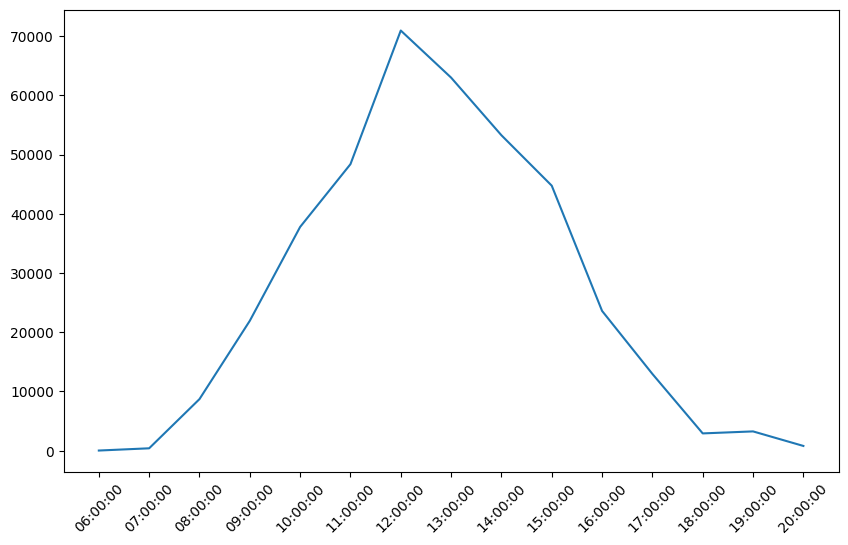

In [30]:
plt.figure(figsize=(10,6))
plt.plot(df_copy.groupby('InvoiceTime')['InvoiceNo'].count().index, df_copy.groupby('InvoiceTime')['InvoiceNo'].count().values)
plt.xticks(rotation=45)
plt.show()

**Insight**

It is apparent that most transactions are taking place in the period between 9:00 am and 2:00 pm

In [31]:
top_10 = df_copy.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_10

StockCode
23843    80995
23166    77916
85099    75620
84077    54319
22197    49160
85123    36763
84879    35241
21212    33646
23084    27153
22492    26076
Name: Quantity, dtype: int64

In [32]:
products = set()  # Use a set for efficient membership checks
query = df_copy['StockCode'].isin(top_10.index)  # Filter rows efficiently
filtered_df = df_copy[query]
for i, row in filtered_df.iterrows():
    products.add(row['Description'])  # Add directly to the set
products

{'ASSORTED COLOUR BIRD ORNAMENT',
 'JUMBO  BAG BAROQUE BLACK WHITE',
 'MEDIUM CERAMIC TOP STORAGE JAR',
 'MINI PAINT SET VINTAGE',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'PAPER CRAFT , LITTLE BIRDIE',
 'RABBIT NIGHT LIGHT',
 'SMALL POPCORN HOLDER',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'}

There are 12 products while we only need 10, which means that there are products in our list that share the same StockCode

In [33]:
product_dict = {}
for index, row in filtered_df.iterrows():
    stock_code = row['StockCode']
    product = row['Description']
  
  # Check if the StockCode exists as a key in the dictionary
    if stock_code not in product_dict:
        product_dict[stock_code] = []  # Initialize an empty list for the products
    if product not in product_dict[stock_code]:
        product_dict[stock_code].append(product)  # Add the product to the list

print(product_dict)

{'85123': ['WHITE HANGING HEART T-LIGHT HOLDER'], '84879': ['ASSORTED COLOUR BIRD ORNAMENT'], '22492': ['MINI PAINT SET VINTAGE'], '85099': ['JUMBO  BAG BAROQUE BLACK WHITE'], '21212': ['PACK OF 72 RETROSPOT CAKE CASES'], '22197': ['SMALL POPCORN HOLDER'], '84077': ['WORLD WAR 2 GLIDERS ASSTD DESIGNS'], '23166': ['MEDIUM CERAMIC TOP STORAGE JAR'], '23084': ['RABBIT NIGHT LIGHT'], '23843': ['PAPER CRAFT , LITTLE BIRDIE']}


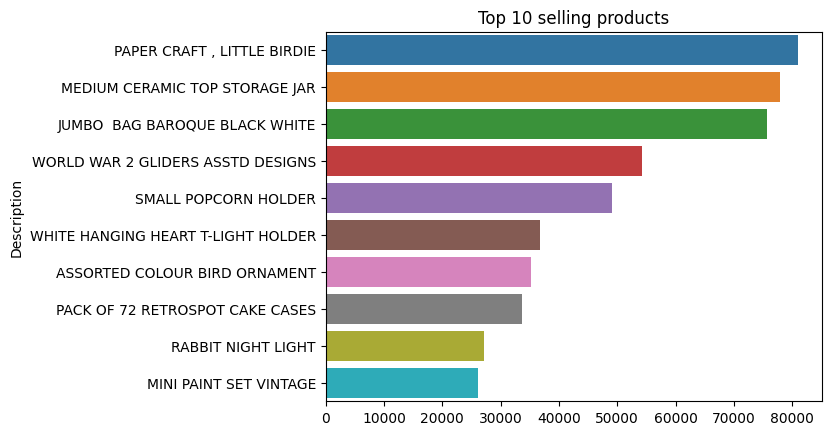

In [34]:
# Graphing the highest 10 products in terms of quantity sold
top_10_new = df_copy.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x = top_10_new.values, y=top_10_new.index)


plt.title("Top 10 selling products")
plt.show()

## Method 1: RFM Analysis

In [35]:
# Creating the recency of transactions of each customer
rfm_r = pd.DataFrame(df_copy['InvoiceDateTime'].max() - df_copy.groupby('CustomerID').agg({'InvoiceDateTime':'max'}).rename(columns={'InvoiceDateTime':'Recency'}))
rfm_r['Recency'] = rfm_r['Recency'].apply(lambda x: x.days)
# Creating the frequency of transactions of each customer
rfm_f = pd.DataFrame(df_copy.groupby('CustomerID').agg({'InvoiceDateTime':'nunique'}).rename(columns={'InvoiceDateTime':'Frequency'}))
# Creating the monetary value of each customer
rfm_m = pd.DataFrame(df_copy.groupby('CustomerID').agg({'GrossRevenue':'sum'}).rename(columns={'GrossRevenue':'MonetaryValue'}))
# Concatinating the three dataframes together
rfm_complete = pd.concat([rfm_r, rfm_f, rfm_m], axis=1)

In [36]:
rfm_complete.head(5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


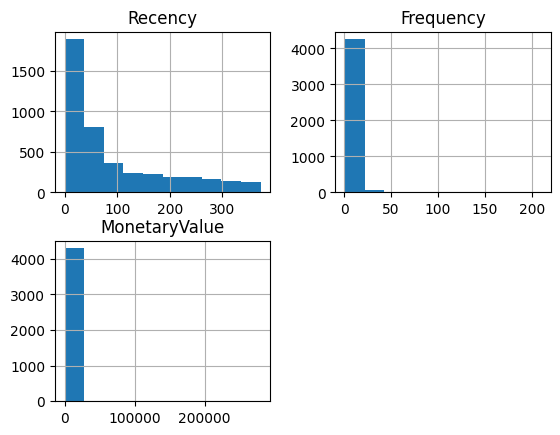

In [37]:
# Figure out the distribution of data for each element
rfm_complete.hist()

plt.show()

#### Note
- It is better to use `qcut` instead of `cut` methods when segmenting customers for each RFM elemnts, since the data is highly skewed.

In [38]:
# Segmenting each element
rfm_complete['RecencyScore'] = pd.qcut(rfm_complete['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_complete['FrequencyScore'] = pd.qcut(rfm_complete['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_complete['MonetaryScore'] = pd.qcut(rfm_complete['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5])

In [39]:
rfm_complete.head()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,325,1,77183.60,1,1,5
12347,1,7,4310.00,5,5,5
12348,74,4,1797.24,2,4,4
12349,18,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2


In [40]:
rfm_complete.head()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,325,1,77183.60,1,1,5
12347,1,7,4310.00,5,5,5
12348,74,4,1797.24,2,4,4
12349,18,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2


## <center>RFM Matrix for Customer Segmentation</center>
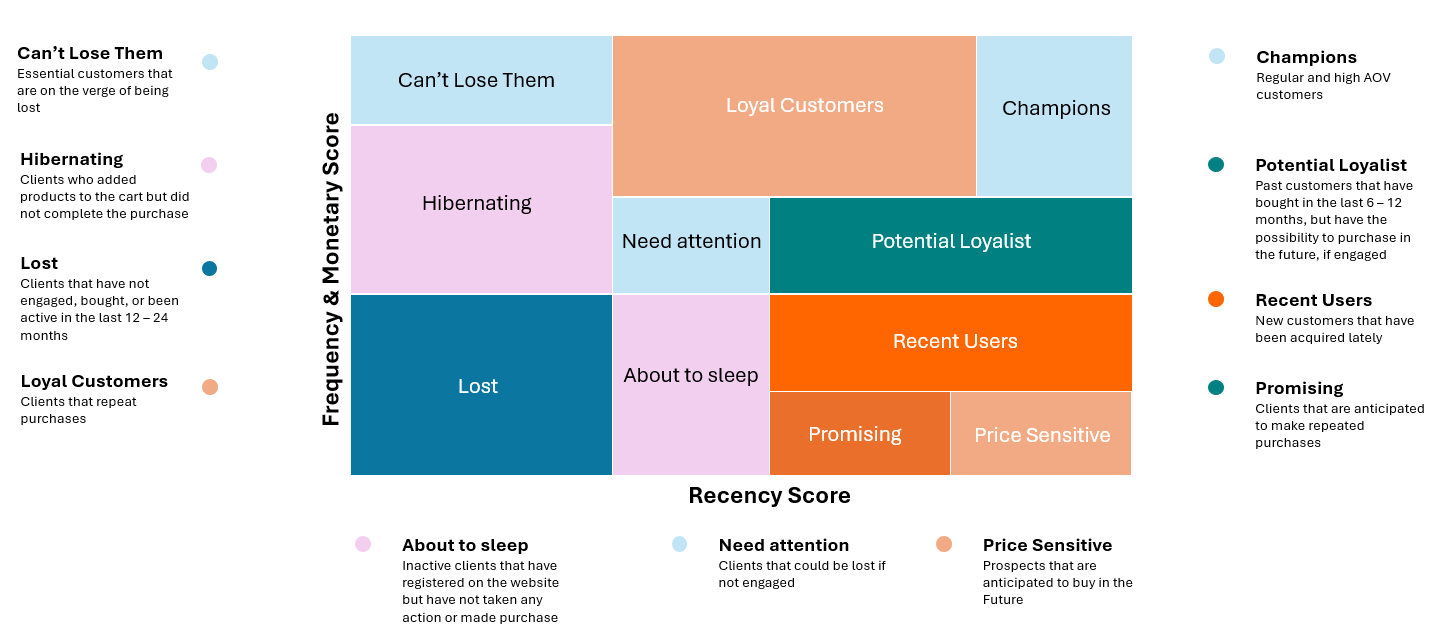

#### Note

To better assign each score to its respective segmentation, we will rely on both Recency and Frequency Scores since it will be easier to do so as we will have at most 25 segments (5 * 5) instead of at most 125 (5 * 5 * 5).

In [41]:
seg_map = {
    r'[1-2][1-2]':'Lost', 
    r'3[1-2]': 'About to Sleep',
    r'41': 'Promising',
    r'5[1-2]': 'Price Sensitive',
    r'[1-2][3-4]': 'Hibernating',
    r'[1-2]5': "Can't lose them",
    r'33':'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'[4-5]2': 'Recent Users',
    r'[4-5]3': 'Potential Loyalists',
    r'5[4-5]':'Champions'
}

rfm_complete['Segment'] = rfm_complete['RecencyScore'].astype(str) + rfm_complete['FrequencyScore'].astype(str)
rfm_complete['Segment'] = rfm_complete['Segment'].replace(seg_map, regex=True)

In [42]:
rfm_complete.head()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,5,Lost
12347,1,7,4310.00,5,5,5,Champions
12348,74,4,1797.24,2,4,4,Hibernating
12349,18,1,1757.55,4,1,4,Promising
12350,309,1,334.40,1,1,2,Lost


In [43]:
rfm_complete.groupby('Segment')['Recency'].agg(['mean','count'])

,mean,count
Segment,,
About to Sleep,52.014620,342
Can't lose them,129.569231,65
Champions,4.881329,632
Hibernating,151.722408,598
Lost,215.769374,1071
Loyal Customers,32.026928,817
Need Attention,50.942529,174
Potential Loyalists,15.328025,314
Price Sensitive,6.000000,100


In [44]:
rfm_complete.describe()

,Recency,Frequency,MonetaryValue
count,4334.000000,4334.000000,4334.000000
mean,91.500692,4.252884,2049.964957
std,100.050386,7.638419,8989.275852
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,306.452500
50%,50.000000,2.000000,670.135000
75%,141.000000,5.000000,1660.895000
max,373.000000,210.000000,280206.020000


In [45]:
rfm_complete[rfm_complete['Recency']< 50]

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Segment
CustomerID,,,,,,,
12347,1,7,4310.00,5,5,5,Champions
12349,18,1,1757.55,4,1,4,Promising
12352,35,8,2506.04,3,5,5,Loyal Customers
12356,22,3,2811.43,4,3,5,Potential Loyalists
12357,32,1,6207.67,4,1,5,Promising
...,...,...,...,...,...,...,...
18274,29,1,175.92,4,2,1,Recent Users
18276,43,1,335.86,3,2,2,About to Sleep
18282,7,2,178.05,5,3,1,Potential Loyalists


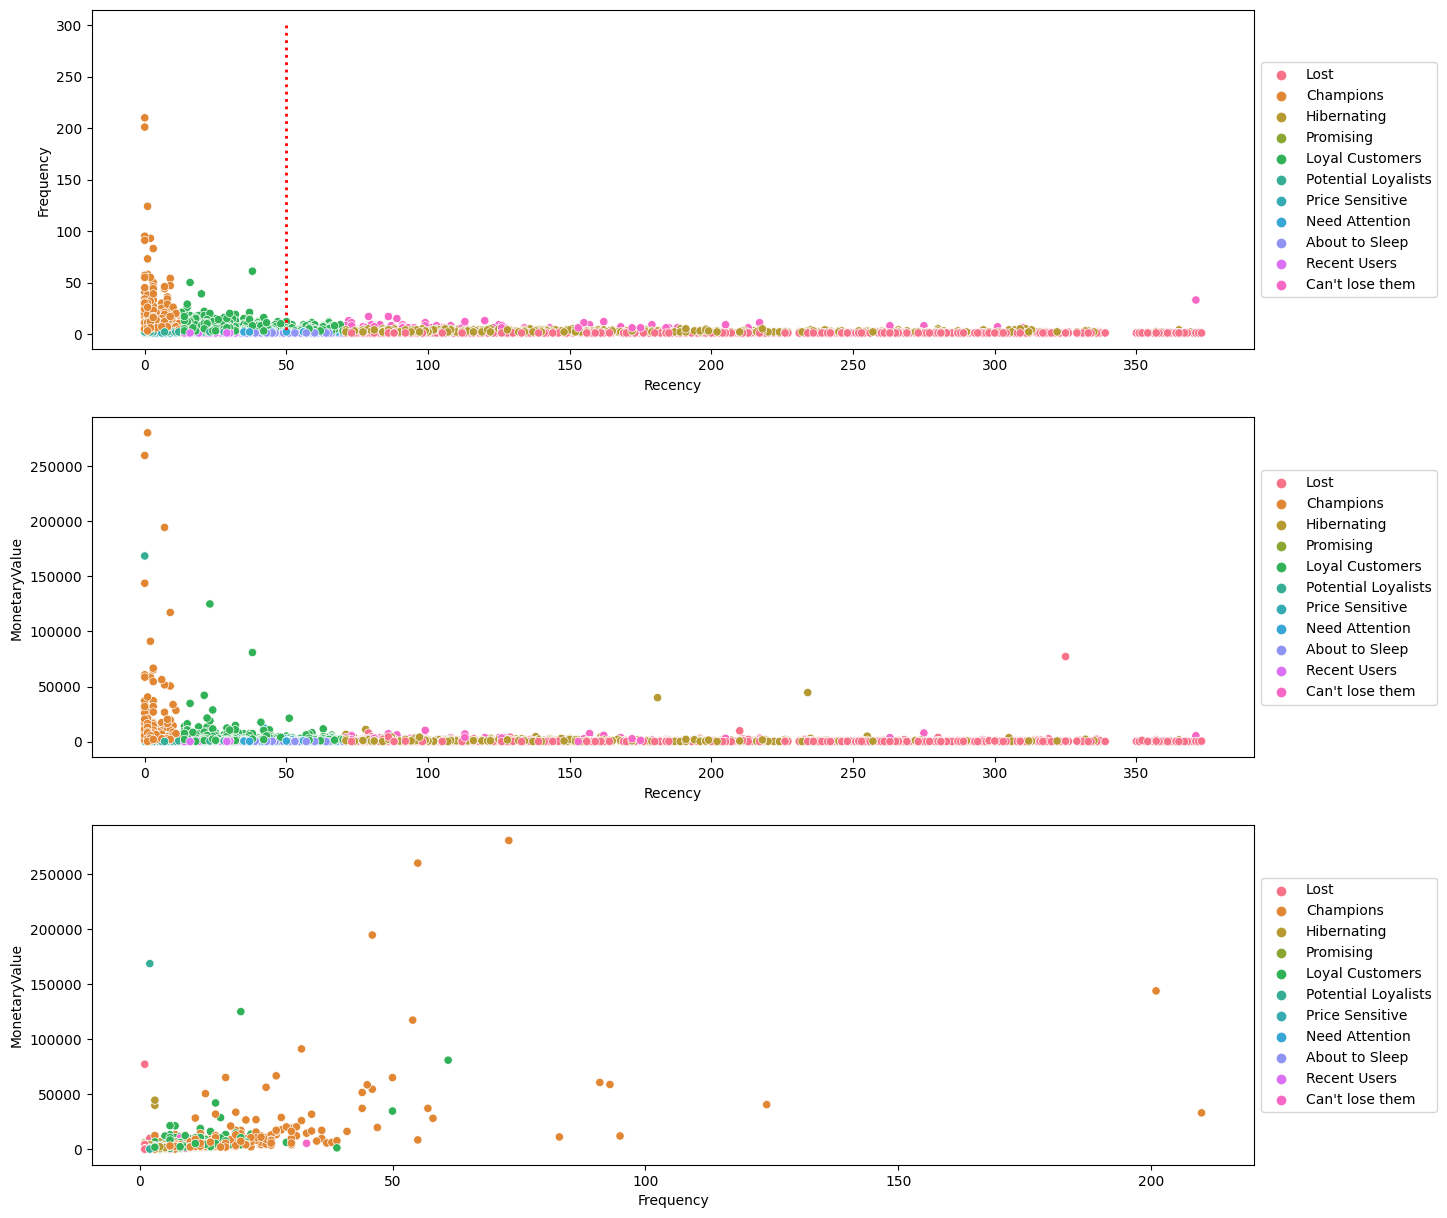

In [46]:
fig, ax = plt.subplots(3, 1, figsize = (15, 15))

sns.scatterplot(ax=ax[0], data=rfm_complete, x='Recency',y='Frequency', hue='Segment')
sns.scatterplot(ax=ax[1], data=rfm_complete, x='Recency',y='MonetaryValue', hue='Segment')
sns.scatterplot(ax=ax[2], data=rfm_complete, x='Frequency',y='MonetaryValue', hue='Segment', legend='brief')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].plot([50,50], [300, 0], linewidth=2, linestyle='dotted', c='r')

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [47]:
rfm_complete[['Frequency','MonetaryValue']].corr()

,Frequency,MonetaryValue
Frequency,1.000000,0.548671
MonetaryValue,0.548671,1.000000


**Insight**

- Both Frequency and Monetray Value seems to have a positive correlation.
- Customers who exceed a threshold of 50 days of not buying are the ones who are most likely to be lost or hibernating customers.

## Method 2: Unsupervised Learning 

In [48]:
# Scaling the features
from sklearn.preprocessing import MinMaxScaler
# Kmeans algorithm
from sklearn.cluster import KMeans
# Pipeline to apply multiple stages of transformation and modeling
from sklearn.pipeline import make_pipeline
# Measuring the silhoutte score of each cluster
from sklearn.metrics import silhouette_score
# Visualizing the silhoutte score of each number of clusters
from yellowbrick.cluster import SilhouetteVisualizer
# Visualiztion
from plotly.express import scatter_3d

In [49]:
rfm_complete_unsupervised = rfm_complete[['Recency', 'Frequency', 'MonetaryValue']]
scaler = MinMaxScaler()
scores=[]

for center in range(2, 8):
    k_means = KMeans(n_clusters = center, random_state=42)
    pipeline = make_pipeline(scaler, k_means)
    model = pipeline.fit(rfm_complete_unsupervised)
    scores.append(abs(model.score(rfm_complete_unsupervised)))

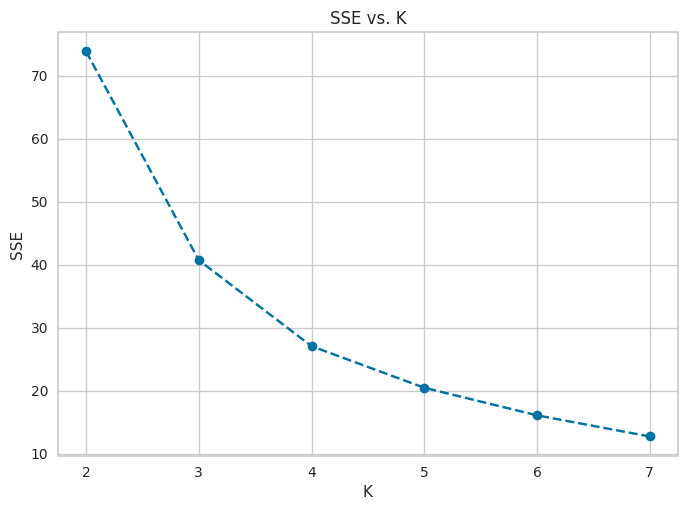

In [50]:
# Visualizing the elbow plot to figure out the best k
plt.plot(range(2, 8), scores, linestyle='--', marker='o', c='b')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')

plt.show()

**Insight**

4 number of clusters demonstrates a drop in the SSE in the clustering process, but the results is somewhat vague. Therefore, we will rely on the Silhouette score.

In [51]:
# Make a dataframe for the scaled variables
rfm_scaled = pd.DataFrame(columns = rfm_complete_unsupervised.columns,
                          data=scaler.fit_transform(rfm_complete_unsupervised.values),
                          index = rfm_complete.index)

for n_clusters = 2, the average silhouette score is 0.7232
for n_clusters = 3, the average silhouette score is 0.6455
for n_clusters = 4, the average silhouette score is 0.5631
for n_clusters = 5, the average silhouette score is 0.5525
for n_clusters = 6, the average silhouette score is 0.5604
for n_clusters = 7, the average silhouette score is 0.5428


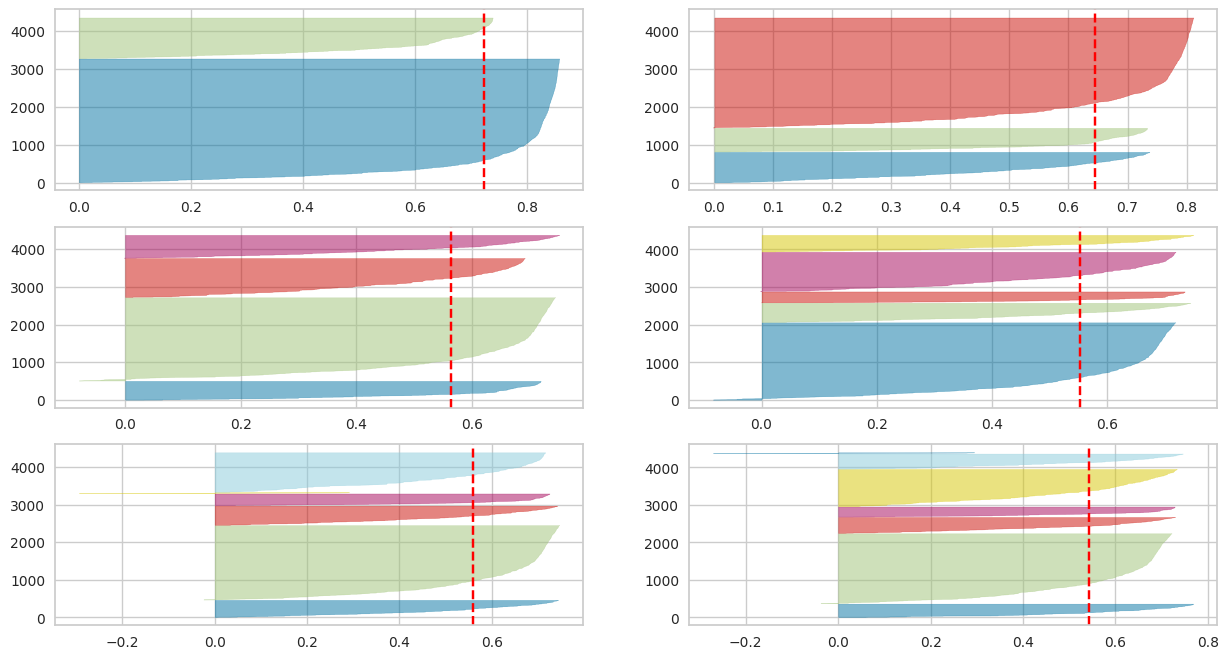

In [52]:
# Plotting the silhoutte score for each cluster
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in range(2, 8):
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    print(f"for n_clusters = {i}, the average silhouette score is {round(silhouette_score(rfm_scaled, km.fit_predict(rfm_scaled)),4)}")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_scaled)

In order to choose the optimal K, two conditions needs to be met in our case:
- Silhouette score of all clusters has to exceed the average score of the whole dataset defined by the red-dotted line
- The size of observations in each cluster has to be somewhat uniform and there should not be a huge gap between observations size between clusters.

All of these conditions are met with K = 4. Therefore, this is the number of K with which we will continue our analysis.

In [53]:
# Applying the KMeans algorithm with 4 number of clusters
kmeans = KMeans(n_clusters=4)
# Adding the cluster column for each customer
rfm_scaled['Cluster'] = kmeans.fit(rfm_scaled).predict(rfm_scaled)

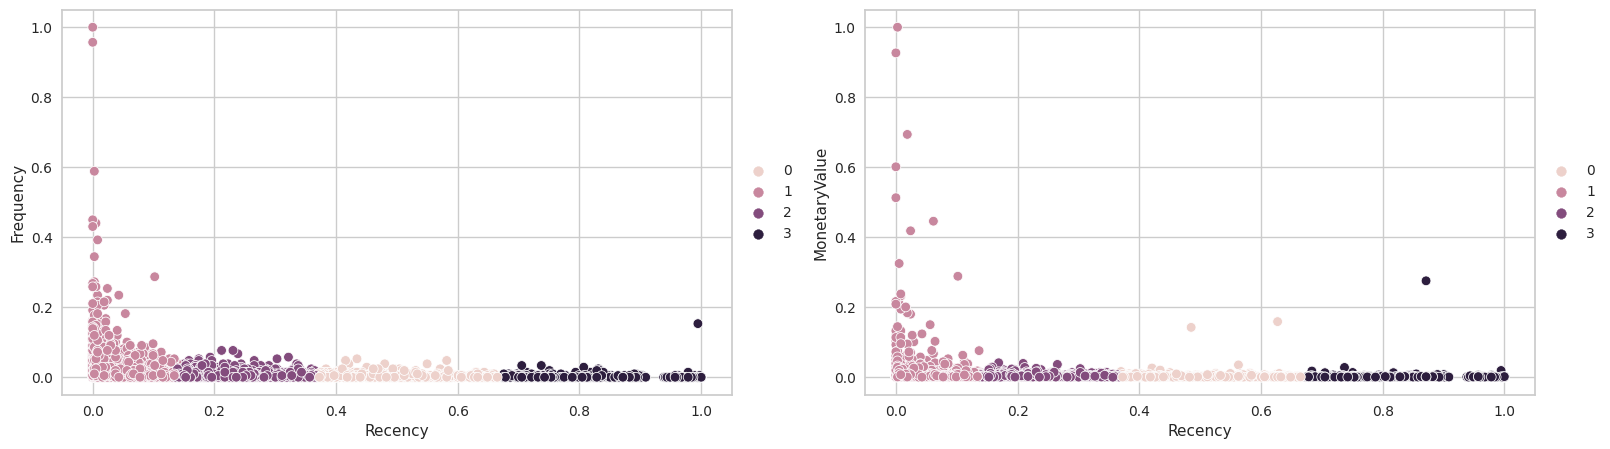

In [54]:
# Plotting the clusters for the customers
fig, ax = plt.subplots(1, 2, figsize = (19, 5))

sns.scatterplot(ax=ax[0], data=rfm_scaled, x='Recency',y='Frequency', hue='Cluster')
sns.scatterplot(ax=ax[1], data=rfm_scaled, x='Recency',y='MonetaryValue', hue='Cluster')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

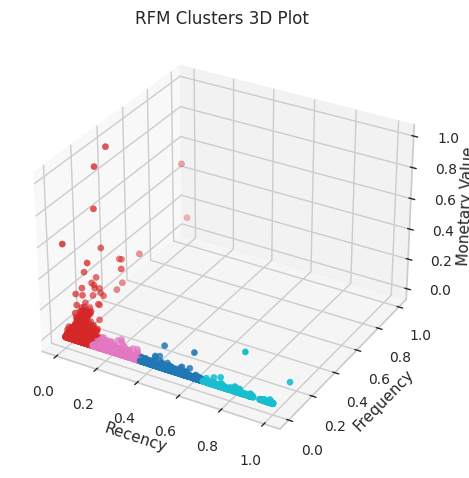

In [55]:
# Create a 3D scatter plot
## Using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(rfm_scaled.iloc[:,0:3])[:, 0], 
           np.array(rfm_scaled.iloc[:,0:3])[:, 1], 
           np.array(rfm_scaled.iloc[:,0:3])[:, 2],
          c=rfm_scaled.iloc[:,3], cmap='tab10')

# Set plot labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

plt.title("RFM Clusters 3D Plot")
plt.show()
## Using Plotly
fig = scatter_3d(
    rfm_scaled,
    x='Recency',
    y='Frequency',
    z='MonetaryValue',
    color='Cluster',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary Value': 'Monetary Value'}
)

fig.show()

**Insight**

- Both 2D and 3D plotting for the clusters confirm that customers with the lowest recency values are the one who are the most likely to have high frequency of purchase and high monetary value of transactions.

In [56]:
# Merging the rfm dataframe before scaling and the Cluster column to deduce some summary statistics
rfm_output = rfm_complete.merge(rfm_scaled['Cluster'], on = rfm_scaled.index).set_index(rfm_complete.index).drop('key_0',axis=1)

In [57]:
# The average monetary value, frequency, and recency of transactions for each cluster
rfm_output.groupby('Cluster')[['MonetaryValue', 'Frequency','Recency']].mean()

,MonetaryValue,Frequency,Recency
Cluster,,,
0,727.463750,1.870647,191.996683
1,3238.084903,6.332728,19.244666
2,1000.550875,2.601358,82.760427
3,565.027143,1.350101,307.983903


**Insight**
- Cluster 2 is composed of customers who are in love with the products provided by the online store and who are the most likely to continue buying from the store in the coming periods.
- Cluster 0 is composed of customers who have fairly high recency values (transaction every 80 days) and moderate amount of number of purchases and monetary value of purchases.
- Both Clusters 1 and 3 are the customers with the highest number of days since their last purchase and with the lowest frequency and monetary values of their transactions. 

## Final Recommendations

- The store is well-established in countries like Netherlands and Japan. However, it has to penetrate more in other markets such as the United States and Saudi Arabia markets by enhancing logistics and shipping operations and further study the markets in these countries and tailor marketing campaigns that are suitable for their culture and perceptions.

- Most transactions take place between 9:00 am and 2:00 pm, therfore it is advisable to increase the offers in these periods by making flash sales or pushing notifications for customers who are hibernated and customers who have high recency and frequency scores.

- Customers with high monetary scores can be mainly concerned with the quality of the products instead of the price. Therefore, these customers can be targeted with products from companies famous for their top-notch products.